In [1]:
#Tutorial 3 - Fuel Poverty Data and Logistic Regression

#Aim of this Tutorial
#1. Explore the Fuel Poverty Dataset, part of the English Housing Survey.
#2. Fit a logistic regression model that predicts whether a household is in fuel poverty or not
#using the data that we have. Assess the fit of the model.

#Dataset constructed from fieldwork carried out between April 2014 and March 2016
#For full description of the variables, visit: http://doc.ukdataservice.ac.uk/doc/8228/mrdoc/pdf/8228_2015_fuel_poverty_dataset_documentation.pdf

In [2]:
fp<-read.csv("fuel_poverty_2015_eul.csv",header = TRUE,sep=",")

In [3]:
#install.packages("plyr", dependencies=T)

In [4]:
library(plyr) #the rename function produces an error if I load both dplyr and plyr, so avoid loading tidyverse here
library(ggplot2)

In [5]:
fp<-rename(fp, c("fpLIHCflg"="In_fuel_Poverty", "fpfullinc"="hh_income","fuelexpn"="fuel_costs", 
             "Unoc"="Under_occupied","gorEHS"="Region", "tenure4x"="Tenure","emphrp3x"="Head_Working_Status",
             "ethhrp2x"="Head_Ethnic_Origin","Ageyng"="Age_of_youngest","Ageold"="Age_of_oldest"))

In [6]:
fp <- subset(fp , select = -c(3:5, 7:11,14:17,20:22,25:28,44:45,48:53) )
summary(fp)

   serialanon        In_fuel_Poverty     HousingCosts     hh_income     
 Min.   :1.415e+10   Length:11955       Min.   :    0   Min.   : -1194  
 1st Qu.:1.415e+10   Class :character   1st Qu.: 2442   1st Qu.: 15558  
 Median :1.516e+10   Mode  :character   Median : 4800   Median : 23141  
 Mean   :1.466e+10                      Mean   : 5248   Mean   : 27935  
 3rd Qu.:1.516e+10                      3rd Qu.: 6760   3rd Qu.: 35057  
 Max.   :1.516e+10                      Max.   :90000   Max.   :100000  
   fuel_costs        elecmop             gasmop          Under_occupied    
 Min.   :  352.5   Length:11955       Length:11955       Length:11955      
 1st Qu.:  958.0   Class :character   Class :character   Class :character  
 Median : 1205.7   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 1278.5                                                           
 3rd Qu.: 1489.9                                                           
 Max.   :11864.0                 

In [7]:
#I will omit the under occupied homes, as the costs will not reflect full occupancy
fp<-subset(fp,fp$Under_occupied=="Not under occupying")

In [8]:
#here our binary response variable (In Fuel Poverty) should be converted to a dummy 0/1 variable
fp$In_fuel_Poverty<-ifelse((fp$In_fuel_Poverty=="Not in fuel poverty - low income high costs measure"),0,1)

In [9]:
str(fp)#In_fuel_Poverty should be a factor and not 'numeric'
fp$In_fuel_Poverty<-as.factor(fp$In_fuel_Poverty)

'data.frame':	9170 obs. of  26 variables:
 $ serialanon         : num  1.42e+10 1.42e+10 1.42e+10 1.42e+10 1.42e+10 ...
 $ In_fuel_Poverty    : num  0 0 0 0 0 0 0 1 0 1 ...
 $ HousingCosts       : num  0 4464 4056 4440 11400 ...
 $ hh_income          : int  22297 17081 33470 13836 32230 25443 55292 21044 15795 13079 ...
 $ fuel_costs         : num  2041 892 1557 1016 1037 ...
 $ elecmop            : chr  "Direct debit" "Direct debit" "Direct debit" "Standard credit" ...
 $ gasmop             : chr  "Direct debit" "n/a = No gas" "Direct debit" "Pre payment" ...
 $ Under_occupied     : chr  "Not under occupying" "Not under occupying" "Not under occupying" "Not under occupying" ...
 $ FullincDeciles     : chr  "5th decile" "3rd decile" "7th decile" "2nd decile" ...
 $ EPC                : chr  "E" "A/B/C" "D" "E" ...
 $ Region             : chr  "North West" "East Midlands" "Yorkshire and the Humber" "London" ...
 $ Ongas              : chr  "Yes" "No" "Yes" "Yes" ...
 $ Tenure           

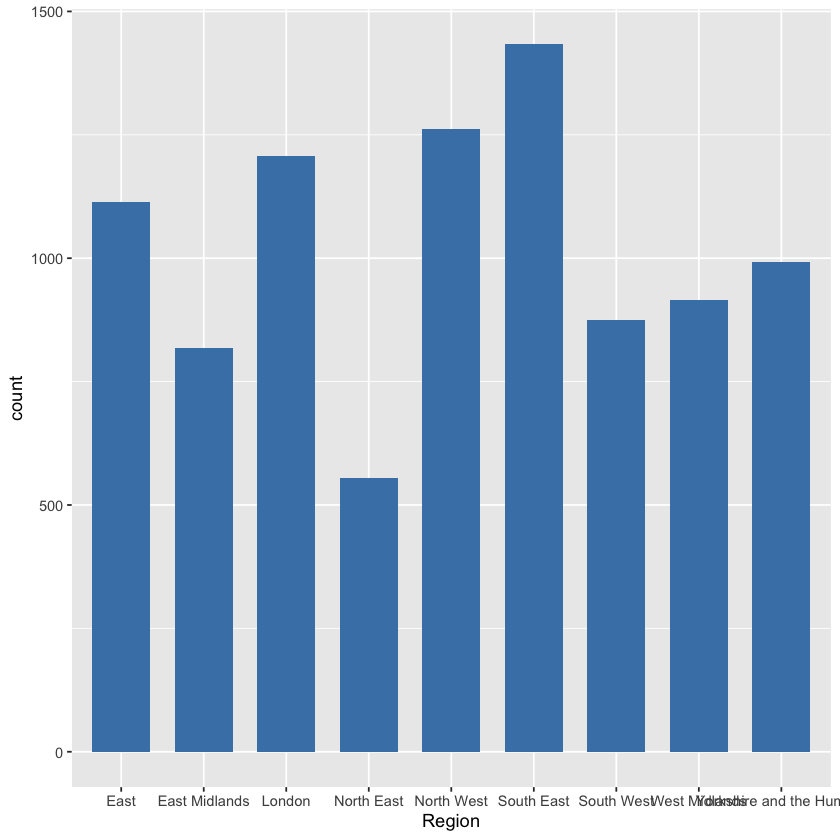

In [10]:
#Lets explore our sample using graphs
p1<-ggplot(fp, aes(x=Region))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p1

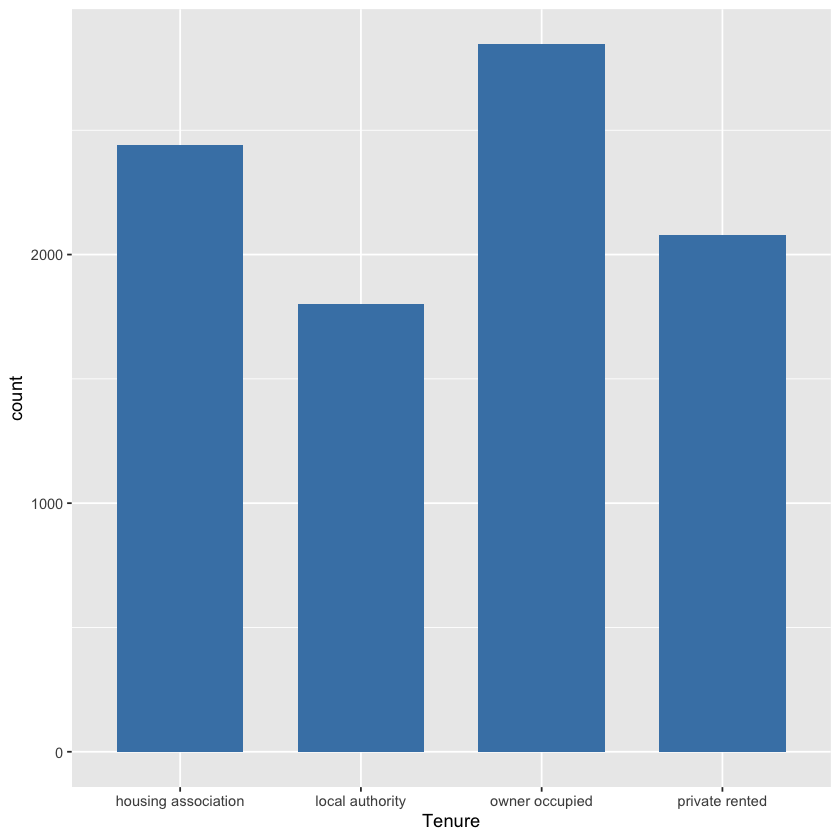

In [11]:
p2<-ggplot(fp, aes(x=Tenure))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p2

In [12]:
#housing association and local authority tenures are usually Social housing
#I will exlude these from my sample, I want to explore private rented and owner occupied dwellings this time
fp<-subset(fp,fp$Tenure=="owner occupied"|fp$Tenure=="private rented")

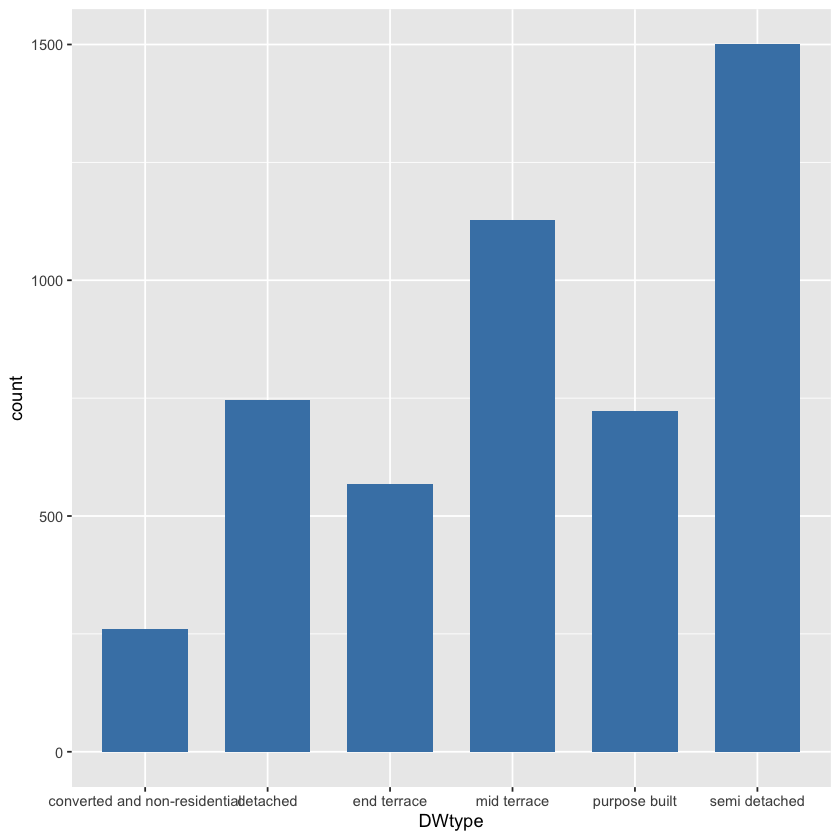

In [13]:
p3<-ggplot(fp, aes(x=DWtype))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p3#there is a category for converted and non residential. I dont want these in my sample, as we are only
#interested in residential properties

In [14]:
#Delete these from your dataframe!
fp<-subset(fp,!fp$DWtype=="converted and non-residential")

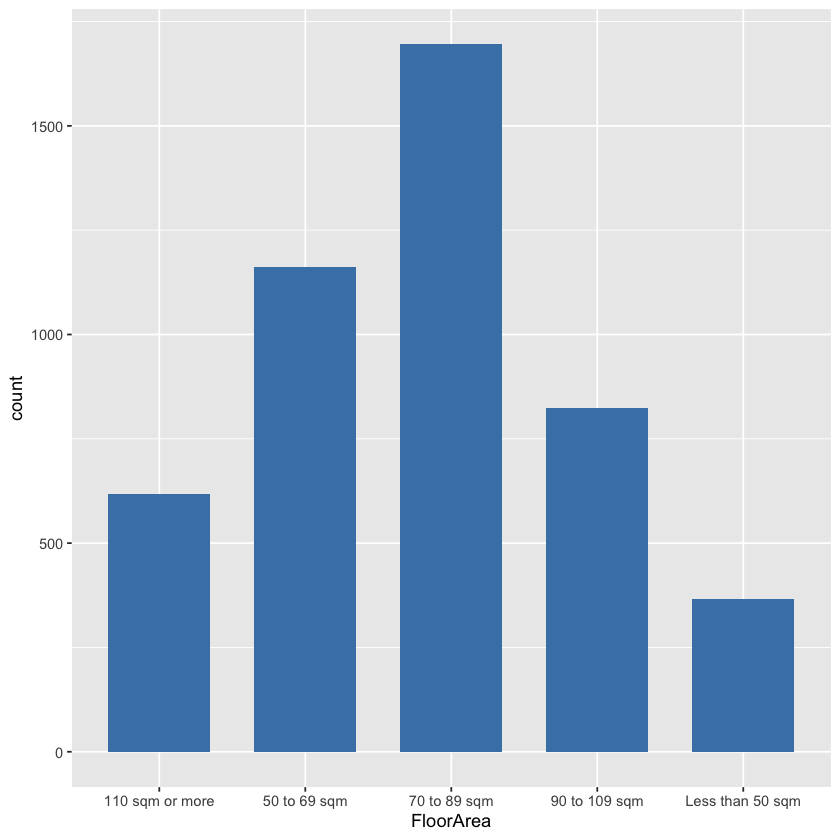

In [15]:
p4<-ggplot(fp, aes(x=FloorArea))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p4 

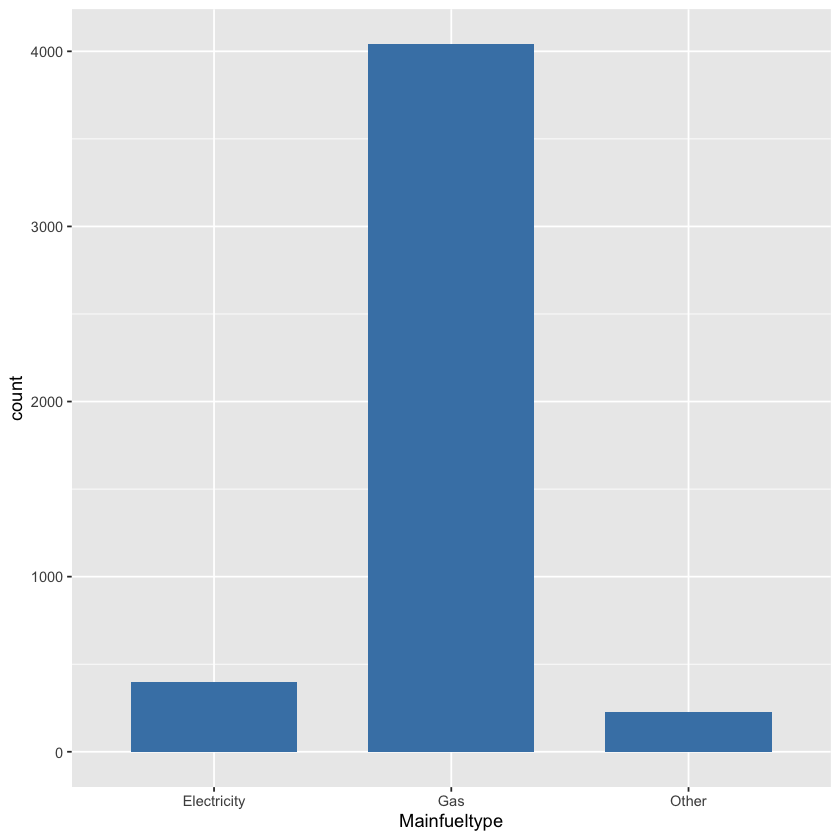

In [16]:
p5<-ggplot(fp, aes(x=Mainfueltype))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p5

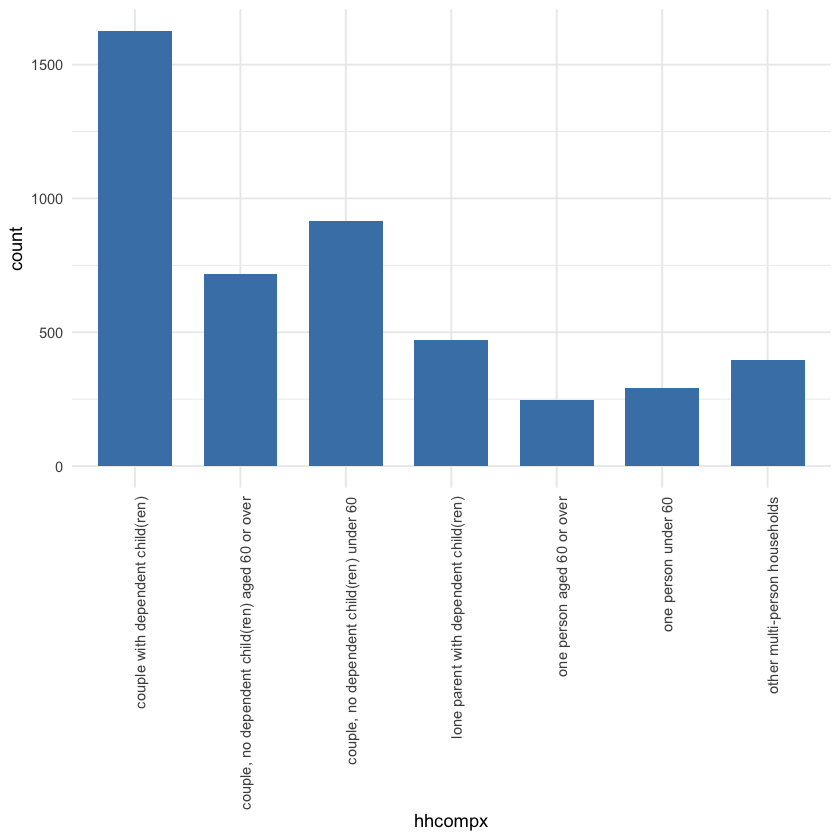

In [17]:
p6<-ggplot(fp, aes(x=hhcompx))+
  geom_bar(stat="count", width=0.7, fill="steelblue")+
  theme_minimal()+ theme(axis.text.x = element_text(angle = 90, hjust = 1))
p6

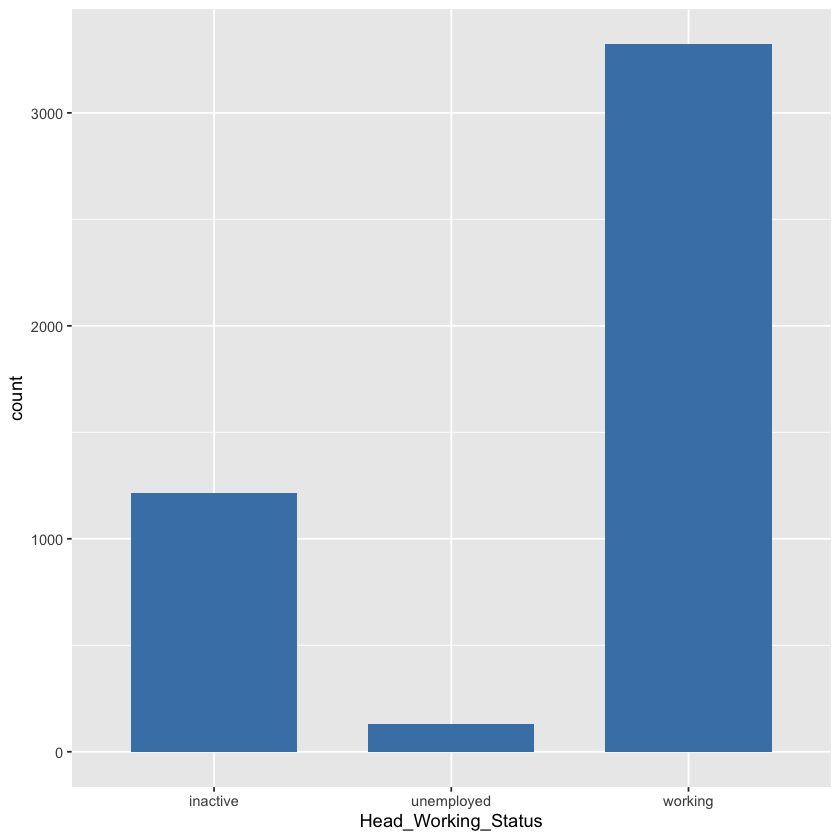

In [18]:
p7<-ggplot(fp, aes(x=Head_Working_Status))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p7

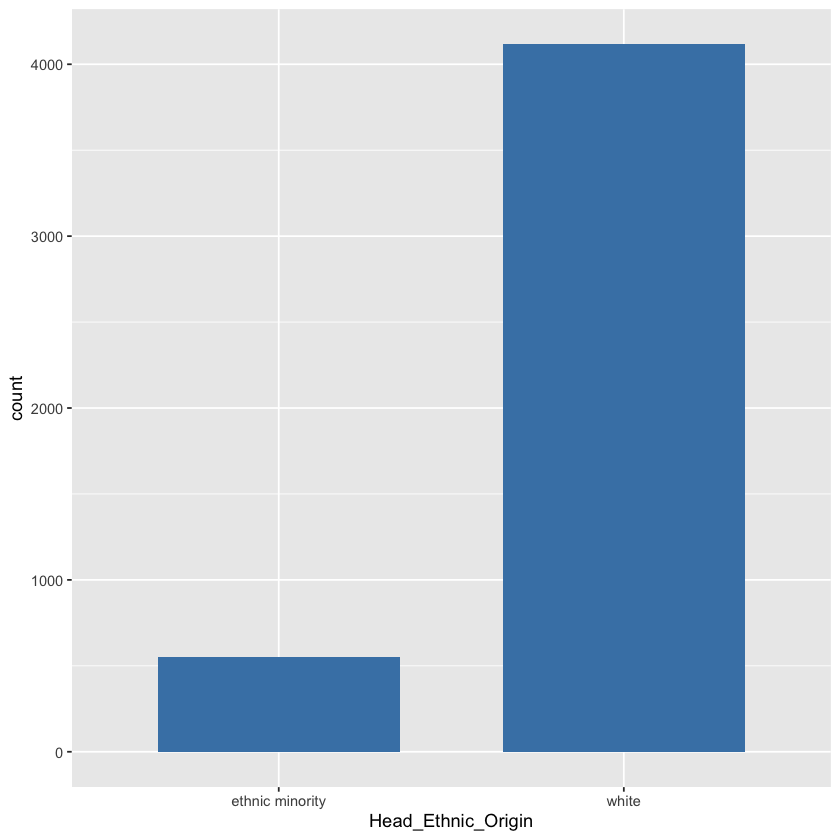

In [19]:
p8<-ggplot(fp, aes(x=Head_Ethnic_Origin))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p8

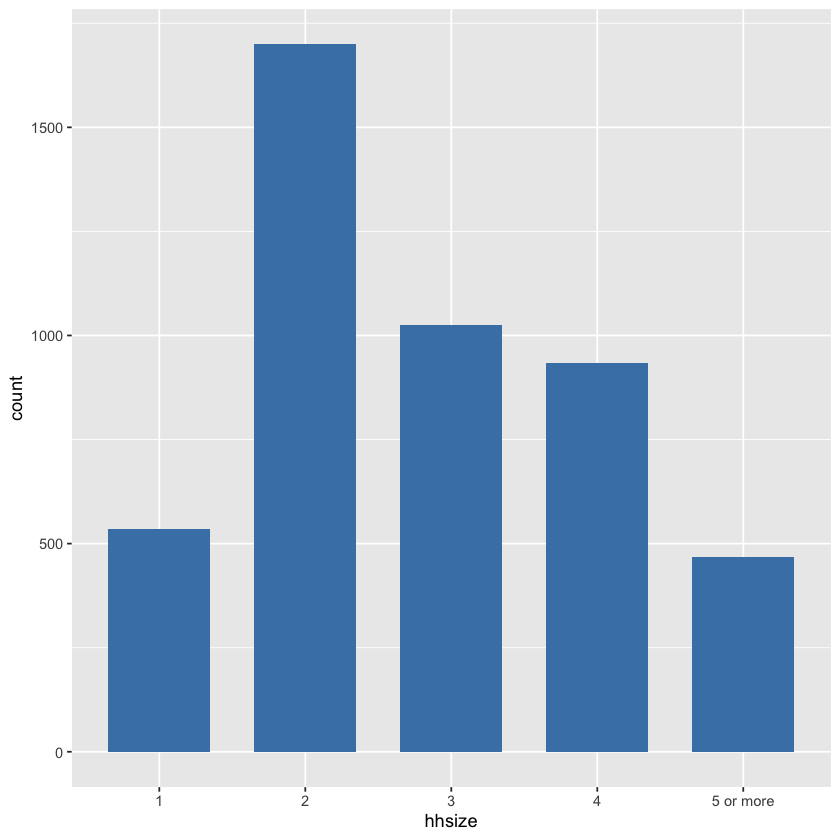

In [20]:
p9<-ggplot(fp, aes(x=hhsize))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p9

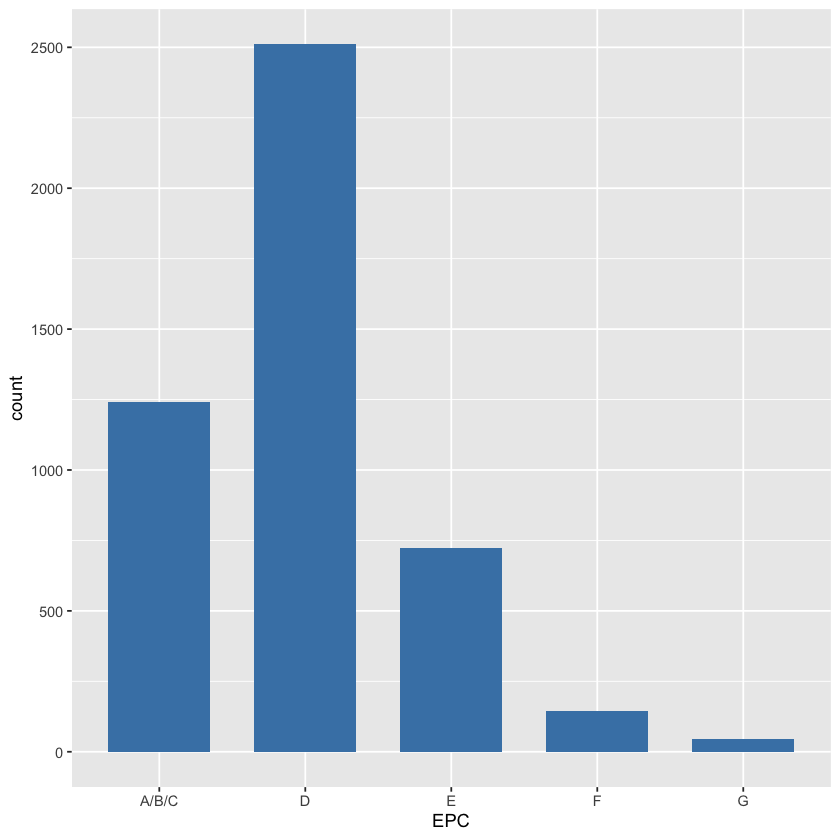

In [21]:
p10<-ggplot(fp, aes(x=EPC))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p10

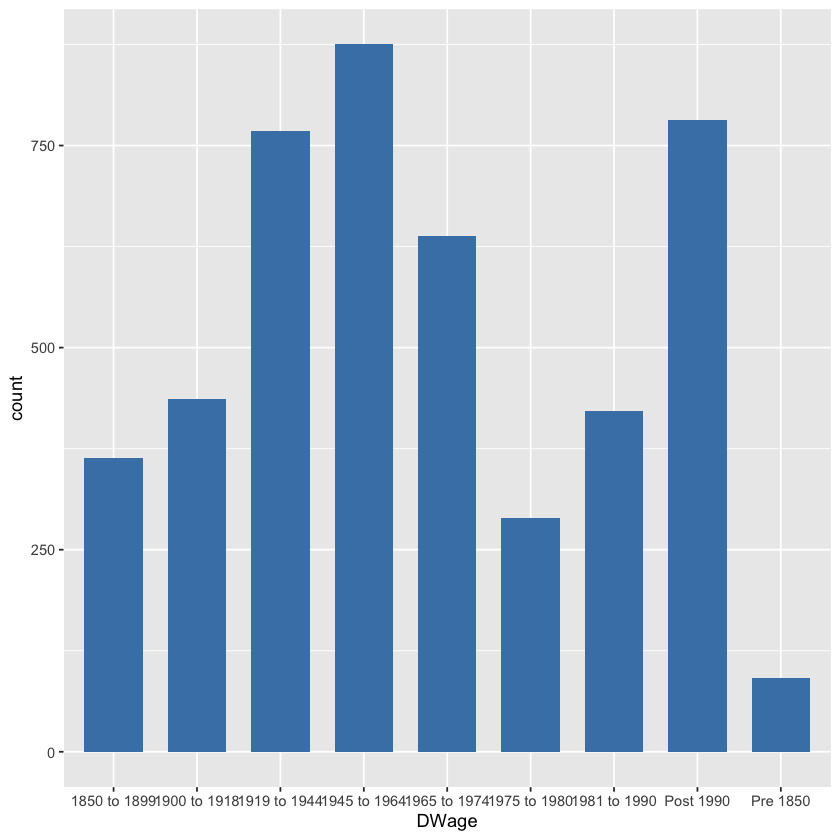

In [22]:
p11<-ggplot(fp, aes(x=DWage))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p11 # too many bins-we should probably aggregate the groups

In [23]:
#lets fix Dwelling Age groupings
str(fp$DWage)
fp$DWage[fp$DWage == "Pre 1850"] <- "Pre 1919"
fp$DWage[fp$DWage == "1850 to 1899"] <- "Pre 1919"
fp$DWage[fp$DWage == "1900 to 1918"] <- "Pre 1919"
fp$DWage[fp$DWage == "1965 to 1974"] <- "1965 to 1980"
fp$DWage[fp$DWage == "1975 to 1980"] <- "1965 to 1980"

 chr [1:4664] "1900 to 1918" "1919 to 1944" "Post 1990" "1919 to 1944" ...


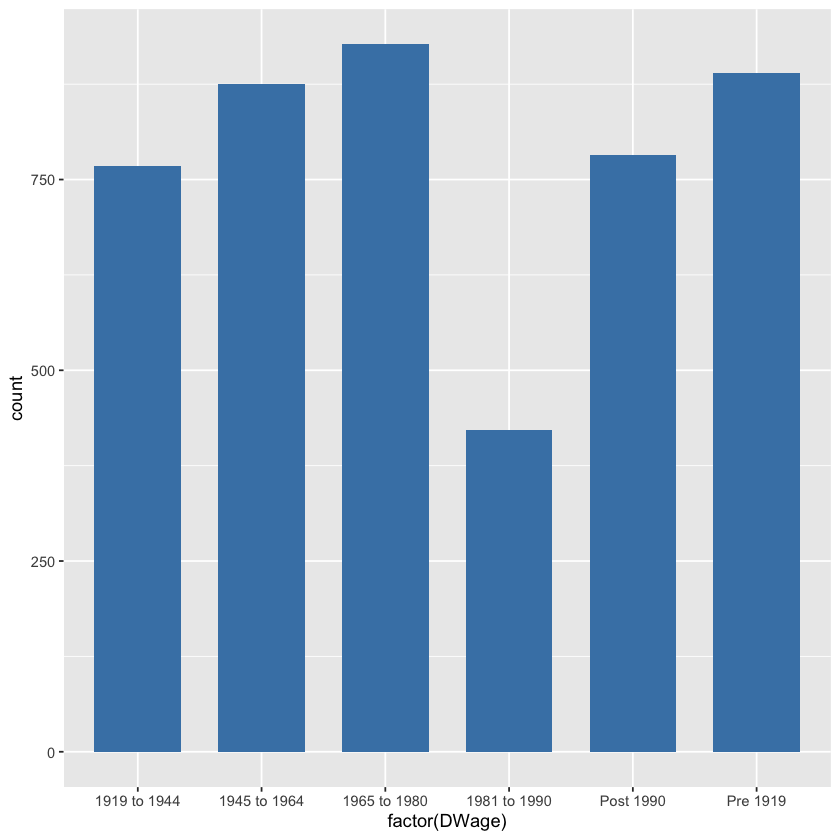

In [24]:
p11<-ggplot(fp, aes(x=factor(DWage)))+
  geom_bar(stat="count", width=0.7, fill="steelblue")
p11 #Age is not displayed in the order that I would prefer. 
    #Run the following code and re-run the plot:

In [25]:
fp$DWage <- factor(fp$DWage,levels = c("Pre 1919", "1919 to 1944", "1945 to 1964","1965 to 1980", "1981 to 1990", "Post 1990"))

summary(fp$hh_income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1194   19482   28668   32392   41005  100000 

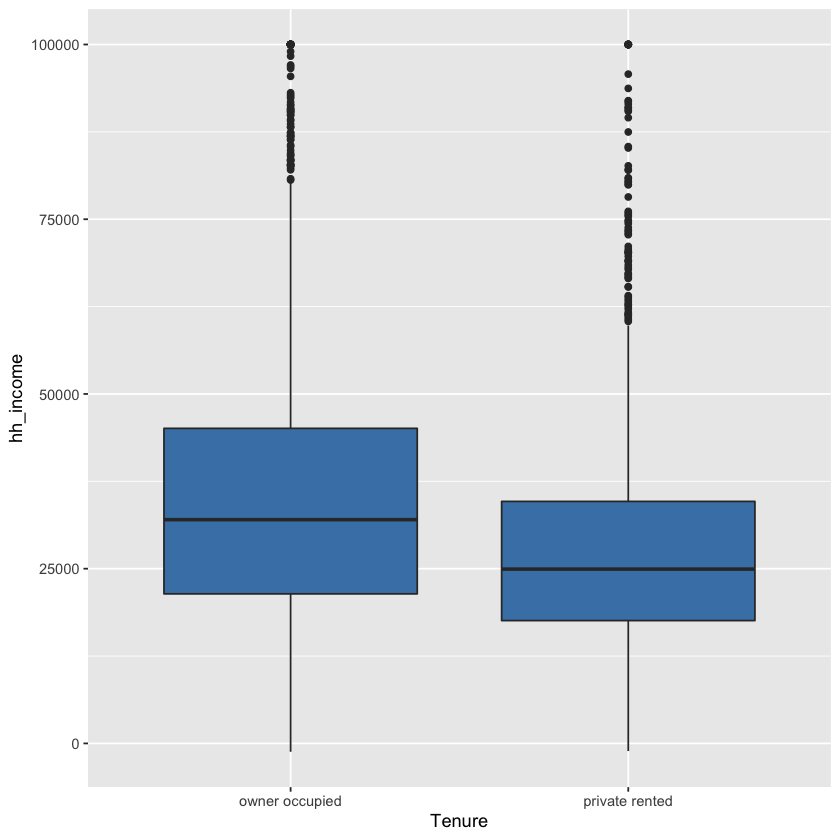

In [26]:
p12<-ggplot(fp, aes(x=Tenure,y=hh_income))+
  geom_boxplot( fill="steelblue")
p12

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



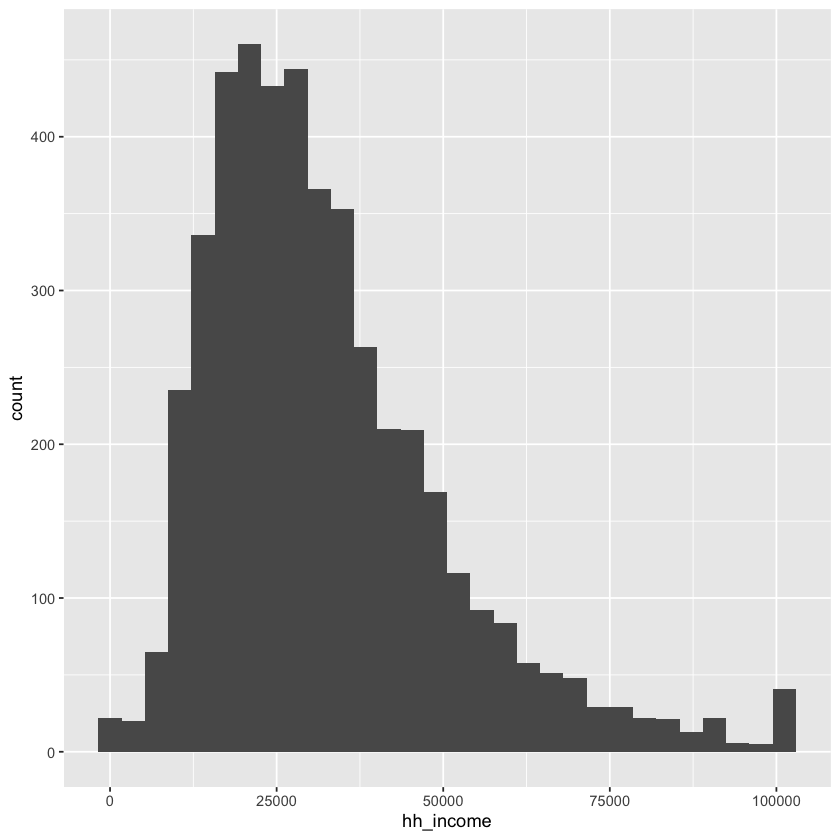

In [27]:
p13<-ggplot(fp, aes(x=hh_income))+
  geom_histogram()
p13

In [28]:
#I am getting a minimum income of -1194 and a Median of around 29000. What should I use as minimum acceptable 
#Income value? I will use the £8000 minimum pension/year.
fp<-subset(fp,fp$hh_income>8000)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  426.9  1081.0  1323.3  1389.4  1608.6 11864.0 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



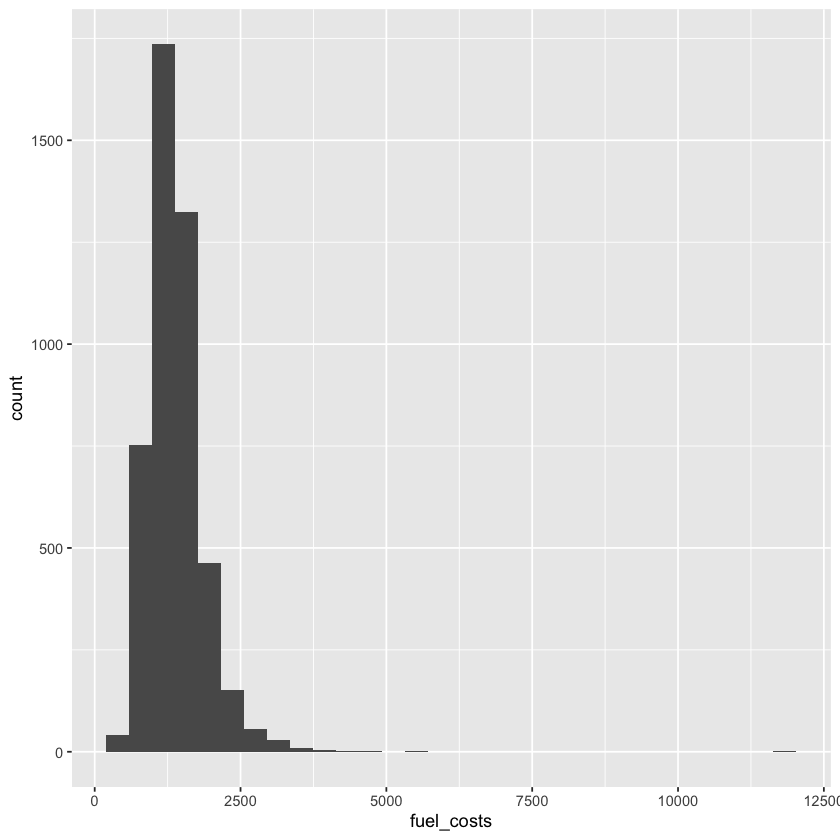

In [29]:
summary(fp$fuel_costs)
p14<-ggplot(fp, aes(x=fuel_costs))+
  geom_histogram()
p14

In [30]:
#there are a couple of observations located quite far away from the rest - will be disregarded as outliers
fp<-subset(fp,fp$fuel_costs<5000)

In [31]:
#I want to check whether my numerical variables are correlated (Collinearity problem). 
#install.packages("corrplot")
#install.packages("corrplot", dependencies=T)
library(corrplot)

corrplot 0.84 loaded



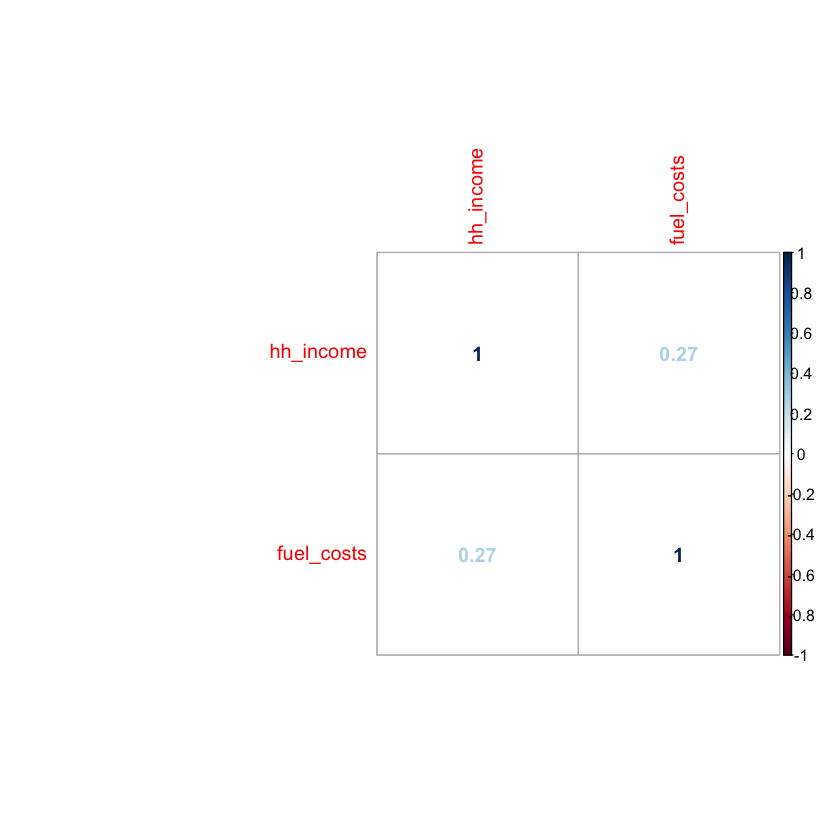

In [32]:
correlations <- cor(fp[,4:5],use="pairwise.complete.obs")
corrplot(correlations, method="number") #for more, see: https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html)
#we see that hh_income and fuel_costs have a low correlation (<0.3). We can still safely include both variables
#in the same model!

In [33]:
str(fp)
fp$EPC<-as.factor(fp$EPC)
fp$DWtype<-as.factor(fp$DWtype)

'data.frame':	4569 obs. of  26 variables:
 $ serialanon         : num  1.42e+10 1.42e+10 1.42e+10 1.42e+10 1.42e+10 ...
 $ In_fuel_Poverty    : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 2 2 1 ...
 $ HousingCosts       : num  0 4440 11400 3307 6360 ...
 $ hh_income          : int  22297 13836 32230 55292 15795 13079 27009 23415 21661 9037 ...
 $ fuel_costs         : num  2041 1016 1037 1537 962 ...
 $ elecmop            : chr  "Direct debit" "Standard credit" "Standard credit" "Direct debit" ...
 $ gasmop             : chr  "Direct debit" "Pre payment" "Standard credit" "Direct debit" ...
 $ Under_occupied     : chr  "Not under occupying" "Not under occupying" "Not under occupying" "Not under occupying" ...
 $ FullincDeciles     : chr  "5th decile" "2nd decile" "7th decile" "9th decile" ...
 $ EPC                : chr  "E" "E" "D" "D" ...
 $ Region             : chr  "North West" "London" "East" "South West" ...
 $ Ongas              : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ Tenure         

In [34]:
#lets fit our fist model

mylog<- glm(In_fuel_Poverty ~  hh_income , data = fp, family = "binomial") #for more, see: https://www.statmethods.net/advstats/glm.html
summary(mylog)
#How do we interprete this result?
#logistic regression coefficients give the change in the log odds of the outcome for a one unit increase 
#in the predictor variable
#For every one unit increase in income, the log odds of being in fuel poverty (versus not being) 
#decreases by 8.7 * 10^(-5)=0.000087

#Alternatively, the ODDS of being in fuel poverty (versus not being) 
#change by e^(-0.000087)=0.999, which means they actually DECREASE by 1-0.999=0.001=0.1%
#Odds can range from 0 to infinity. 
#In other words, as income of the household increases, the odds of it experiencing fuel poverty decrease.

#Lets look at Deviance:a measure of goodness of fit of a model. Higher numbers always indicate bad fit.
#Null Deviance
#shows how well the response variable is predicted by a model that includes only the intercept (grand mean)
#Residual Deviance: shows how well the response variable is predicted by a model that includes predictors

#The z-value is the regression coefficient divided by its standard error.
#If the z-value is big in magnitude (either positive or negative), 
#it indicates that the corresponding regression coefficient is not 0 and the corresponding X-variable matters.

#AIC: Akaike Information Criterion: does not tell me anything if I am just looking at one model
#I care about how it changes as we add one variable at a time.
#If it decreases, it means that my fit is improving


Call:
glm(formula = In_fuel_Poverty ~ hh_income, family = "binomial", 
    data = fp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0655  -0.6058  -0.3830  -0.1671   3.3289  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.344e-01  1.181e-01   3.678 0.000235 ***
hh_income   -8.725e-05  4.938e-06 -17.671  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3617.3  on 4568  degrees of freedom
Residual deviance: 3121.0  on 4567  degrees of freedom
AIC: 3125

Number of Fisher Scoring iterations: 6


In [35]:
mylogit2<- glm(In_fuel_Poverty ~ hh_income + fuel_costs, data =fp, family = "binomial")
summary(mylogit2)
mylogit3<- glm(In_fuel_Poverty ~  hh_income + fuel_costs + EPC, data = fp, family = "binomial")
summary(mylogit3)
mylogit4<- glm(In_fuel_Poverty ~  hh_income + fuel_costs + EPC + DWtype, data = fp, family = "binomial")
summary(mylogit4)
coef(mylogit4)
#Create another model, including Dwelling Age as a feature. What did you discover?


Call:
glm(formula = In_fuel_Poverty ~ hh_income + fuel_costs, family = "binomial", 
    data = fp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0998  -0.4006  -0.1709  -0.0319   3.9488  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.410e+00  2.004e-01  -17.02   <2e-16 ***
hh_income   -1.810e-04  8.291e-06  -21.83   <2e-16 ***
fuel_costs   4.087e-03  1.722e-04   23.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3617.3  on 4568  degrees of freedom
Residual deviance: 2133.0  on 4566  degrees of freedom
AIC: 2139

Number of Fisher Scoring iterations: 7



Call:
glm(formula = In_fuel_Poverty ~ hh_income + fuel_costs + EPC, 
    family = "binomial", data = fp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6404  -0.3711  -0.1344  -0.0213   3.9604  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.864e+00  2.893e-01 -16.812  < 2e-16 ***
hh_income   -2.000e-04  9.177e-06 -21.792  < 2e-16 ***
fuel_costs   5.085e-03  2.335e-04  21.780  < 2e-16 ***
EPCD         7.564e-01  2.172e-01   3.483 0.000495 ***
EPCE         9.556e-02  2.527e-01   0.378 0.705263    
EPCF        -1.763e+00  3.858e-01  -4.569 4.89e-06 ***
EPCG        -3.475e+00  6.532e-01  -5.319 1.04e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3617.3  on 4568  degrees of freedom
Residual deviance: 2008.1  on 4562  degrees of freedom
AIC: 2022.1

Number of Fisher Scoring iterations: 7



Call:
glm(formula = In_fuel_Poverty ~ hh_income + fuel_costs + EPC + 
    DWtype, family = "binomial", data = fp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6127  -0.3659  -0.1319  -0.0211   3.9851  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -5.412e+00  3.566e-01 -15.176  < 2e-16 ***
hh_income           -1.993e-04  9.232e-06 -21.587  < 2e-16 ***
fuel_costs           5.174e-03  2.415e-04  21.422  < 2e-16 ***
EPCD                 7.719e-01  2.180e-01   3.541 0.000398 ***
EPCE                 1.010e-01  2.541e-01   0.398 0.690976    
EPCF                -1.749e+00  3.874e-01  -4.514 6.36e-06 ***
EPCG                -3.391e+00  6.575e-01  -5.157 2.51e-07 ***
DWtypeend terrace    5.745e-01  2.183e-01   2.631 0.008509 ** 
DWtypemid terrace    6.390e-01  1.928e-01   3.315 0.000917 ***
DWtypepurpose built  5.063e-01  2.588e-01   1.956 0.050419 .  
DWtypesemi detached  2.113e-01  1.884e-01   1.122 0.262071    


(Intercept)           hh_income          fuel_costs                EPCD 
      -5.4116150252       -0.0001992949        0.0051740565        0.7718561566 
               EPCE                EPCF                EPCG   DWtypeend terrace 
       0.1010254434       -1.7489783795       -3.3906563501        0.5744646445 
  DWtypemid terrace DWtypepurpose built DWtypesemi detached 
       0.6390483695        0.5062525114        0.2113114833

In [36]:
#Lets interprete the results of my final model, mylogit4
#For every one unit increase in income, the log odds of being in fuel poverty (versus not being) 
#decreases by 0.0002. 
#For every one unit increase in fuel costs, the log odds of being in fuel poverty (versus not being) 
#increases by 0.005. 
#Interpreting the estimates for EPC, which is a categorical variable is a bit different:
summary(fp$EPC)#R has chosen EPC A/B/C as the reference case - it compares all categories to that

A/B/C     D     E     F     G 
 1213  2463   710   142    41

In [37]:
#Belonging to EPC Band D versus belonging to A/B/C increases the log odds of being in fuel poverty (versus not being) 
#by 0.77


summary(fp$DWtype)#R has chosen Detached as the reference case (DWtype Detached) - it compares all categories to that
#Living at a mid terrace versus living in a Detached house, increases the log odds of being in fuel poverty 
#by 0.64. So the ODDS increase by (e^0.64)

detached   end terrace   mid terrace purpose built semi detached 
          735           559          1101           686          1488

In [38]:
#******Note: If I am just looking for a relationship between dependent and independent variables, I do not need to do the next steps.
#******These are mentioned here for exploratory purposes.

#lets calculate probabilities analytically, for a more meaningful interpretation.
#Probability can range from 0 to 1. Probability greater than 0.5 indicates success is more likely than failure. 
#Probability less than 0.5 indicates failure is more likely than success.
#Lets look at our 11th observation

#lets look at household 11: income:15795, fuel costs: 961.53, EPC:A/B/C, Dwelling type: detached
y=-5.412-0.0002*15795+0.0052*961.53

In [39]:
y

[1] -3.571044

In [40]:
#What is the probability that House 11 is in fuel poverty?
#probability=ODDS(y)/(1+ODDS(y)), ODDS(y)=exp(y)
probability<-exp(y)/(1+exp(y))
probability# I get a 0.027 probability that the house is in fuel poverty

[1] 0.02735702

In [41]:
#lets see using another (quite faster) method to find probabilities:
fp$EPC<-as.factor(fp$EPC)
p<-predict(mylogit4, fp, type="response")
p # here I see that house 11 has a 0.027 probability, like in my calculations above


2            6            7            9           11           13 
7.347476e-01 1.022563e-01 4.135936e-03 5.559648e-04 2.700210e-02 4.677541e-01 
          14           20           22           25           26           32 
4.437694e-01 1.679515e-01 8.520723e-01 3.299245e-01 6.406596e-05 1.876464e-03 
          33           34           37           38           39           43 
2.124003e-01 1.845983e-02 2.060036e-04 7.475781e-02 1.561460e-01 1.182642e-04 
          44           46           48           49           51           52 
9.318767e-01 2.341053e-01 1.180164e-01 3.894094e-01 8.058857e-02 2.153283e-02 
          54           60           61           65           66           68 
2.777865e-04 4.406529e-03 9.727192e-01 6.275120e-04 1.159758e-01 2.943102e-01 
          73           75           78           84           85           87 
3.289889e-01 1.337362e-01 3.454734e-03 7.349050e-03 2.282504e-02 3.120874e-03 
          94           95          103          107          108          109 
1.012767e-01 1.691483e-01 1.194905e-04 3.627236e-01 1.309457e-04 8.532841e-01 
         112          117          118          119          120          121 
5.786040e-03 3.864543e-02 4.777641e-02 1.586279e-01 1.597791e-01 2.448249e-01 
         122          123          125          134          137          142 
1.914149e-01 1.155696e-01 3.725147e-03 1.181335e-01 1.842880e-03 3.564841e-01 
         143          149          151          153          157          161 
2.451835e-01 7.618161e-01 2.165338e-03 8.951574e-07 2.256921e-03 4.819677e-02 
         163          169          170          172          173          180 
7.544481e-03 7.949843e-01 2.684104e-02 6.407607e-02 6.360979e-01 1.163947e-01 
         181          183          185          189          190          192 
2.856153e-05 3.466188e-02 7.903181e-08 1.348777e-05 3.805732e-04 3.667018e-05 
         193          197          198          202          203          208 
2.235617e-01 2.245291e-04 7.616877e-03 1.878690e-02 2.908144e-06 6.085900e-01 
         209          211          212          213          216          217 
1.277854e-02 1.330791e-06 5.282117e-02 1.424006e-01 7.398746e-03 3.769991e-02 
         218          221          223          224          228          235 
3.949420e-01 8.730657e-01 8.662004e-03 7.721360e-01 1.460175e-08 2.484044e-02 
         241          242          243          247          252          253 
1.983793e-01 1.405857e-01 1.362720e-03 3.717446e-01 2.425740e-01 2.274658e-02 
         254          255          256          259          260          261 
9.732408e-05 2.017886e-03 3.838246e-01 4.227639e-03 4.694585e-01 3.868068e-02 
         264          269          270          274          277          278 
1.079306e-01 8.739713e-05 7.748205e-03 9.788598e-02 4.416931e-01 2.441572e-01 
         280          285          286          288          289          294 
2.844327e-03 1.439511e-04 1.775129e-02 5.005868e-02 4.261812e-01 2.832630e-01 
         297          303          305          306          307          309 
2.864867e-01 2.907621e-02 3.723986e-01 6.775338e-02 9.097156e-02 2.551184e-04 
         310          311          314          319          320          322 
5.448906e-01 5.901973e-02 7.883211e-01 5.370777e-03 6.904409e-03 7.924192e-01 
         331          333          335          337          339          340 
3.359791e-02 1.088888e-02 9.551244e-02 4.212003e-02 9.260824e-03 2.507250e-03 
         344          346          347          351          352          357 
7.037559e-01 6.712524e-03 8.599003e-02 5.629561e-03 3.142001e-03 6.140408e-05 
         358          362          363          364          366          367 
6.931692e-05 2.975853e-03 5.834301e-01 1.114153e-02 1.935695e-01 1.518987e-01 
         371          373          376          377          378          381 
6.191337e-02 2.508252e-03 1.022474e-01 1.302211e-02 3.431022e-01 8.922974e-01 
         383          389          391          392          

In [42]:
#no exact equivalent to the R2 of linear regression exists, 
#the McFadden R2 index can be used to assess the model fit

#install.packages("blorr", dependencies=T)
#library(blorr)

In [43]:
#blr_rsq_mcfadden(mylogit4)

#You could also try Maximum likelihood pseudo r-squared (Cox & Snell) and 
#Cragg and Uhler's or Nagelkerke's pseudo r-squared. 
#0.4494323